## **Milestone 1: Data Collection, Exploration, and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("D:/Programming/Projects/3- Customer Churn Prediction/Datasets/train.csv")
df_test = pd.read_csv("D:/Programming/Projects/3- Customer Churn Prediction/Datasets/test.csv")

In [ ]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
df_train.shape

(165034, 14)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Handle Missing Values:**

In [ ]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Handle Duplicated:**

In [ ]:
df_train.duplicated().sum()

0

**Handle Outliers:**

In [ ]:
numeric_cols = [col for col in df_train.columns if df_train[col].dtypes != 'O']
categorical_cols = [col for col in df_train.columns if df_train[col].dtypes == 'O']

In [ ]:
outliers_summary = {}
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    Q1 = df_train[col].quantile(0.25)  
    Q3 = df_train[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: CreditScore, Outliers: 253
Column: Age, Outliers: 6394
Column: Tenure, Outliers: 0
Column: Balance, Outliers: 0
Column: EstimatedSalary, Outliers: 0


In [ ]:
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    Q1 = df_train[col].quantile(0.25)  
    Q3 = df_train[col].quantile(0.75)  
    IQR = Q3 - Q1                  
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_train = df_train[(df_train[col] >= lower_bound) & (df_train[col] <= upper_bound)]

In [ ]:
df_train.shape

(158400, 14)

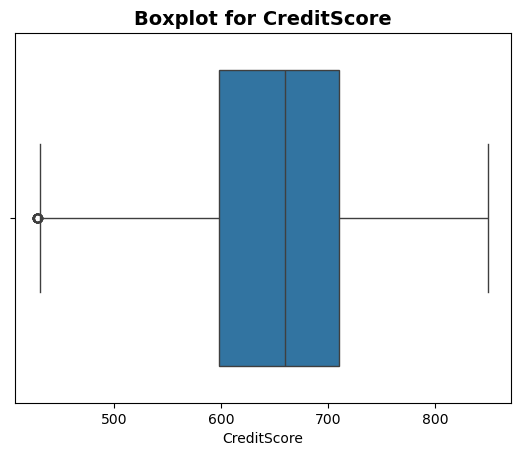

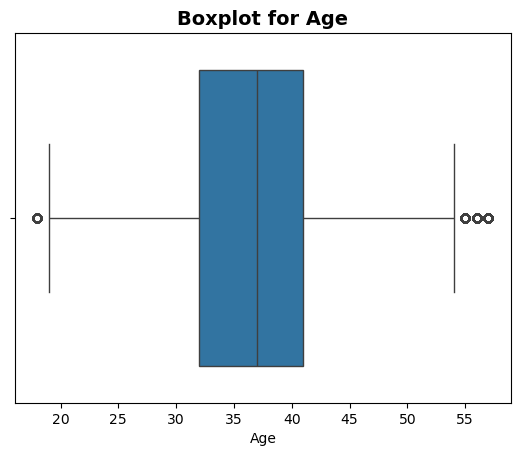

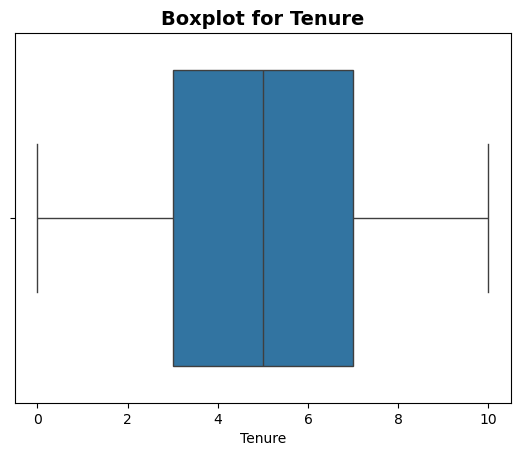

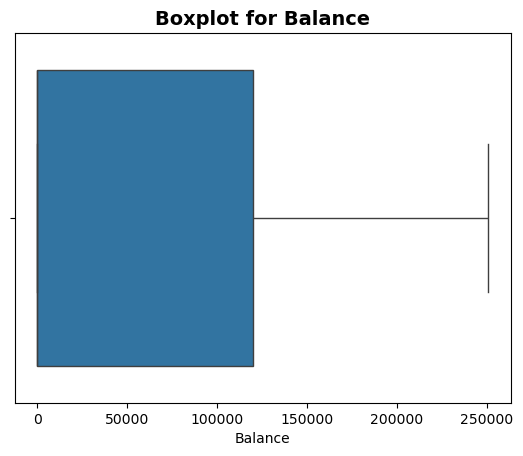

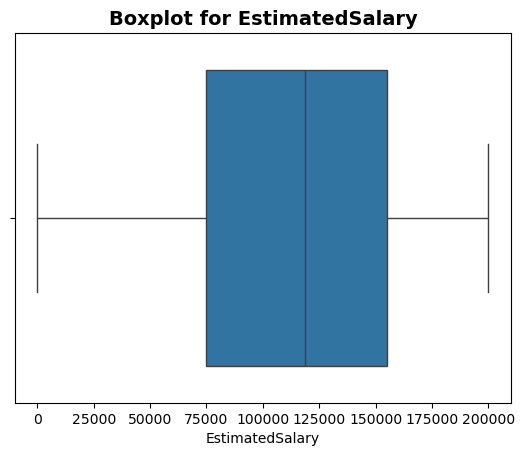

In [ ]:
for col in ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]:
    sns.boxplot(x = df_train[col])
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.show()

In [ ]:
df_train.to_csv("cleaned_data.csv", index=False)

In [ ]:
df_train.drop(["id","CustomerId","Surname"], axis=1, inplace=True)

**Encoding and Scaling:**

In [ ]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
# label encoding
df_train["Gender"] = df_train["Gender"].map({"Male": 0, "Female": 1})

# one-hot encoding
df_encoded = pd.get_dummies(df_train, columns=["Geography"], drop_first=True)
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,668,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False
1,627,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False
2,678,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False
3,581,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False
4,716,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True


In [ ]:
df_encoded.to_csv("encoded_data.csv", index=False)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.140430,0,-0.558113,-0.721924,-0.880520,0.812555,1.0,0.0,1.368262,0,False,False
1,-0.375705,0,-0.558113,-1.435221,-0.880520,0.812555,1.0,1.0,-1.259511,0,False,False
2,0.266316,0,0.392022,1.774613,-0.880520,0.812555,1.0,0.0,1.436307,0,False,False
3,-0.954783,0,-0.422380,-1.078573,1.491077,-1.022654,1.0,1.0,-0.561328,0,False,False
4,0.744685,0,-0.558113,-0.008628,-0.880520,0.812555,1.0,1.0,-1.945293,0,False,True


In [ ]:
df_scaled.to_csv("scaled_data.csv", index=False)

# **Milestone 2: Advanced Data Analysis and Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("cleaned_data.csv")
df_scaled = pd.read_csv("scaled_data.csv")

**EDA:**

In [ ]:
# How many total customers are there?
print(f"Total number of customers: {df_train["Exited"].count()}")

Total number of customers: 158400


In [ ]:
# What is the overall churn rate? (percentage of customers who exited)
print(f"Churn rate: {df_train["Exited"].mean() * 100:.2f}%")

Churn rate: 20.46%


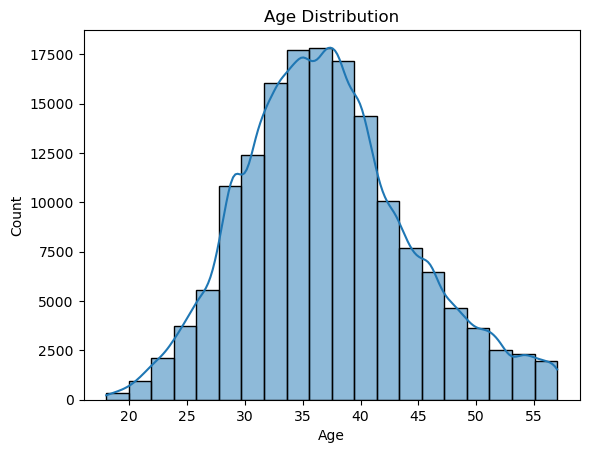

In [ ]:
# What is the age distribution of customers? Is there a relationship between age and churn?
sns.histplot(df_train["Age"], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

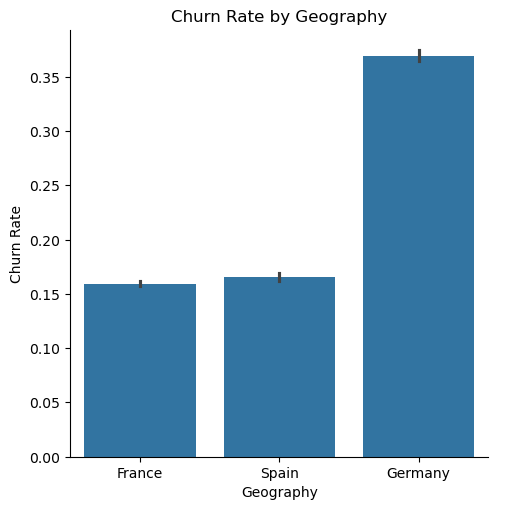

In [ ]:
# Which countries have the highest churn rates? (Geography vs. Exited)
sns.catplot(x="Geography", y="Exited", data=df_train, kind="bar")
plt.xlabel("Geography")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Geography")
plt.show()

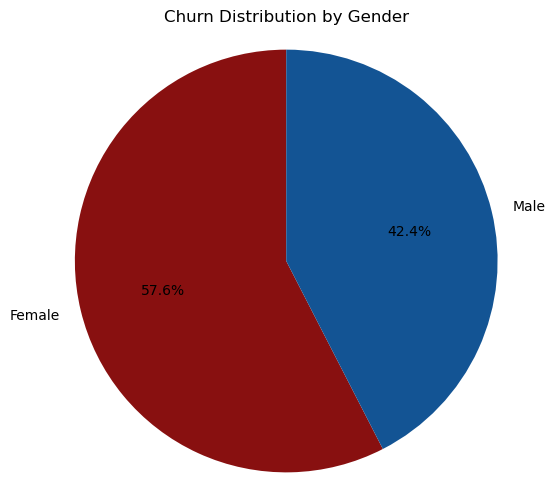

In [ ]:
# Is there a difference in churn between males and females?
churn_by_gender = df_train[df_train["Exited"] == 1]["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    churn_by_gender,
    labels=churn_by_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#881010", "#135494"]
)
plt.title("Churn Distribution by Gender")
plt.axis("equal")
plt.show()

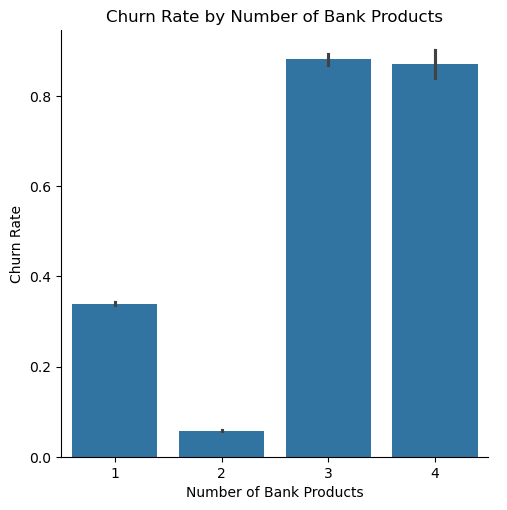

In [ ]:
# Does the number of bank products affect churn?
sns.catplot(x="NumOfProducts", y="Exited", data=df_train, kind="bar")
plt.xlabel("Number of Bank Products")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Number of Bank Products")
plt.show()

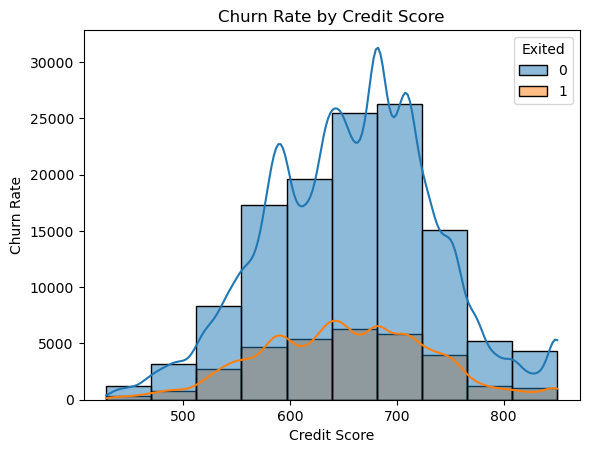

In [ ]:
# Does a lower credit score increase the likelihood of churn?
sns.histplot(x =df_train["CreditScore"], bins=10, kde=True, hue=df_train["Exited"])
plt.xlabel("Credit Score")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Credit Score")
plt.show()

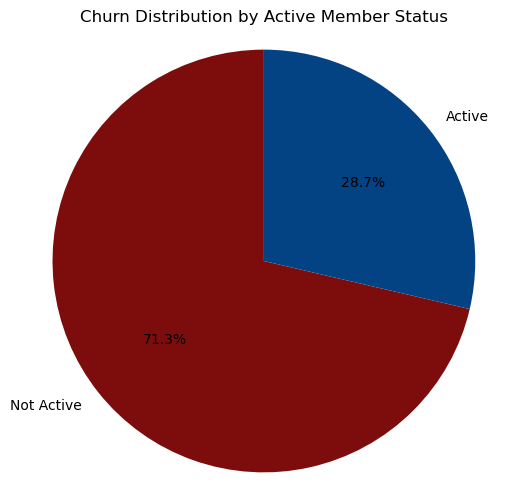

In [ ]:
# Are inactive members more likely to churn?
churn_by_activity = df_train[df_train["Exited"] == 1]["IsActiveMember"].value_counts()
labels = ["Not Active", "Active"]

plt.figure(figsize=(6, 6))
plt.pie(churn_by_activity, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#7d0c0c", "#034383"])
plt.title("Churn Distribution by Active Member Status")
plt.axis("equal")
plt.show()

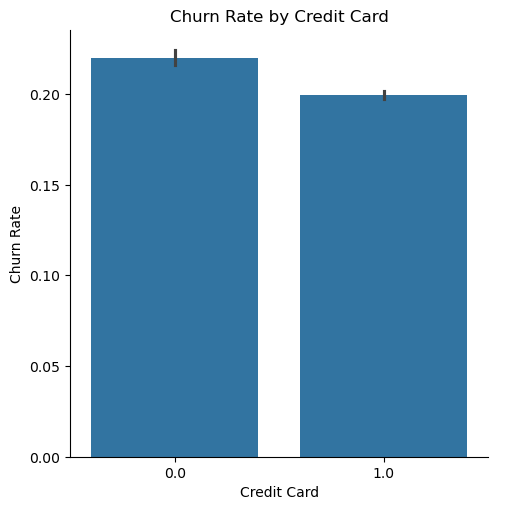

In [ ]:
# Is owning a credit card related to churn?
sns.catplot(x="HasCrCard", y="Exited", data=df_train, kind="bar")
plt.xlabel("Credit Card")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Credit Card")
plt.show()

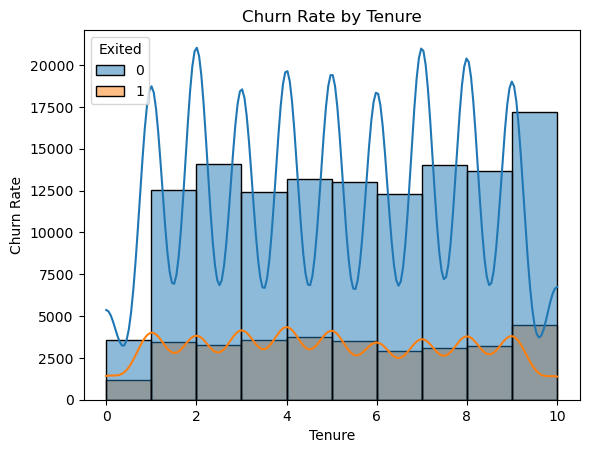

In [ ]:
# Are older customers or those with shorter tenure more likely to leave?
sns.histplot(x =df_train["Tenure"], bins=10, kde=True, hue=df_train["Exited"])
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure")
plt.show()

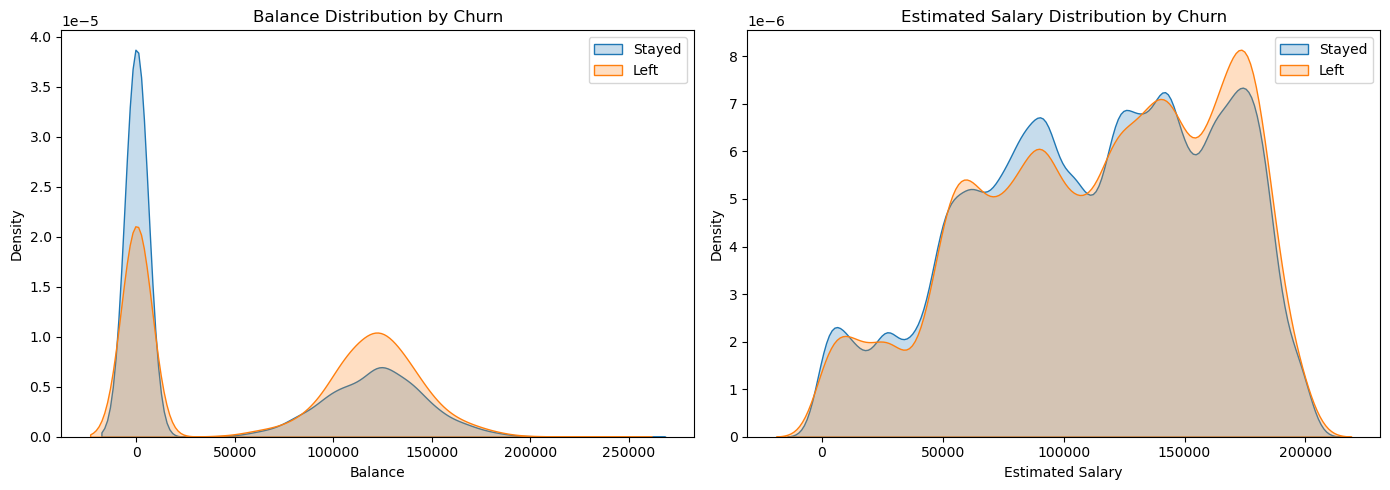

In [ ]:
# Does account balance or estimated salary have a relationship with churn?
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.kdeplot(data=df_train[df_train["Exited"] == 0]["Balance"], label="Stayed", fill=True,ax=axes[0])
sns.kdeplot(data=df_train[df_train["Exited"] == 1]["Balance"], label="Left", fill=True,ax=axes[0])
axes[0].set_title("Balance Distribution by Churn")
axes[0].set_xlabel("Balance")
axes[0].legend()

sns.kdeplot(data=df_train[df_train["Exited"] == 0]["EstimatedSalary"], label="Stayed", fill=True,ax=axes[1])
sns.kdeplot(data=df_train[df_train["Exited"] == 1]["EstimatedSalary"], label="Left", fill=True,ax=axes[1])
axes[1].set_title("Estimated Salary Distribution by Churn")
axes[1].set_xlabel("Estimated Salary")
axes[1].legend()

plt.tight_layout()
plt.show()

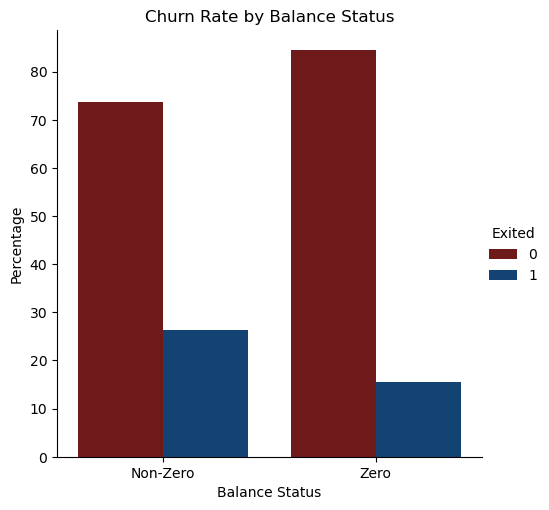

In [ ]:
# Do customers with a zero balance tend to leave more?
df = df_train.copy()
df["ZeroBalance"] = df_train["Balance"].apply(lambda x: "Zero" if x == 0 else "Non-Zero")

plot_data = (
    df.groupby("ZeroBalance")["Exited"]
    .value_counts(normalize=True)
    .rename("ChurnRate")
    .reset_index()
)

plot_data["ChurnRate"] *= 100

sns.catplot(
    data=plot_data,
    kind="bar",
    x="ZeroBalance",
    y="ChurnRate",
    hue="Exited",
    palette= ["#7d0c0c", "#034383"]
)

plt.title("Churn Rate by Balance Status")
plt.xlabel("Balance Status")
plt.ylabel("Percentage")
plt.show()

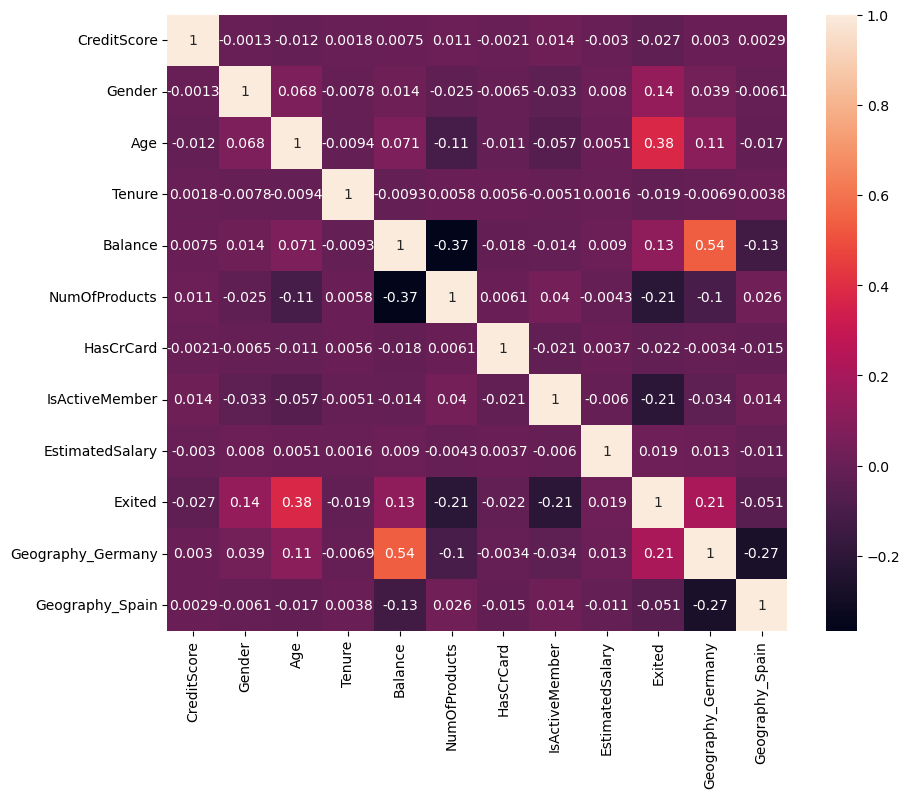

In [ ]:
# Correlation Heatmap
corr = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

# **Milestone 3: Machine Learning Model Development and Optimization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [ ]:
df_scaled = pd.read_csv("scaled_data.csv")
df_encoded = pd.read_csv("encoded_data.csv")

In [ ]:
from imblearn.combine import SMOTEENN
X = df_scaled.drop("Exited", axis=1)
y = df_scaled["Exited"]
smote_enn = SMOTEENN(random_state = 42)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### **1- Logistic Regression:**

Accuracy: 0.829126463398945
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     17328
           1       0.85      0.84      0.84     21537

    accuracy                           0.83     38865
   macro avg       0.83      0.83      0.83     38865
weighted avg       0.83      0.83      0.83     38865



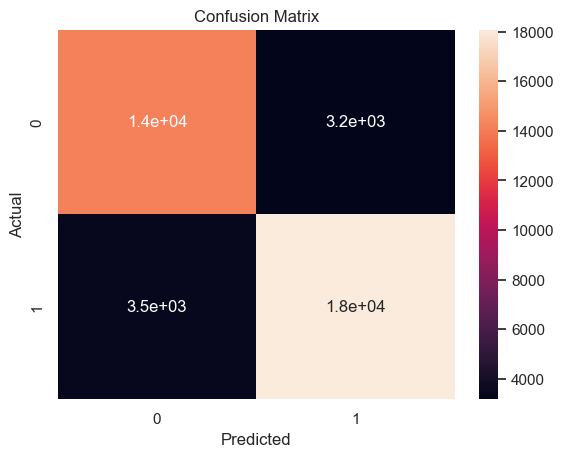

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(lr_model, X_train, y_train, cv=kf)
print (cv_results)
print (cv_results.mean())

[0.82925511 0.82971826 0.83133925 0.82883057 0.82883057 0.82767271]
0.8292744114241607


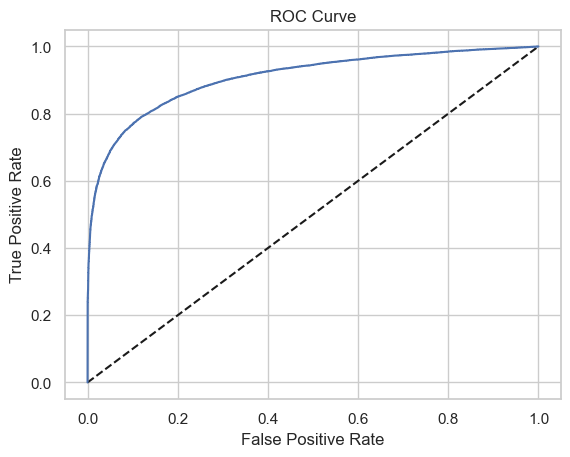

 AUC Score: 0.9078312603262886


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

**Hyperparameters**

c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

Best Parameters: {'C': 0.01, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     17328
           1       0.85      0.84      0.85     21537

    accuracy                           0.83     38865
   macro avg       0.83      0.83      0.83     38865
weighted avg       0.83      0.83      0.83     38865

Accuracy: 0.8295896050430979


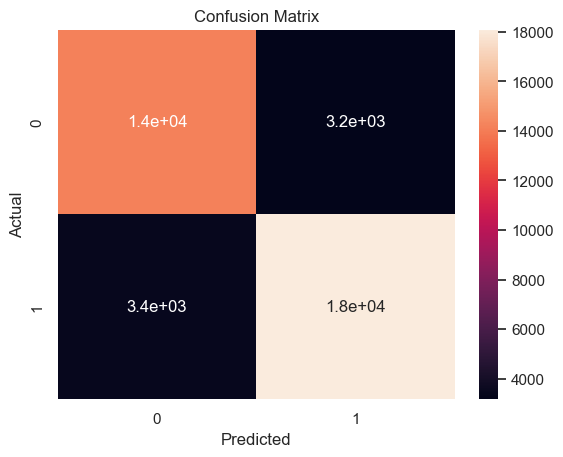

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [None, 0.5, 1]
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

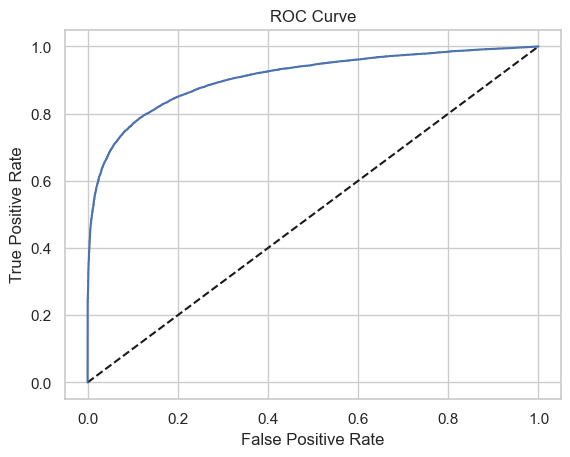

 AUC Score: 0.9077796596987786


In [ ]:
y_pred_proba = best_model.predict_proba(X_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **2- KNN:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9588665134309925
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95     25939
           1       0.95      0.98      0.96     32359

    accuracy                           0.96     58298
   macro avg       0.96      0.96      0.96     58298
weighted avg       0.96      0.96      0.96     58298



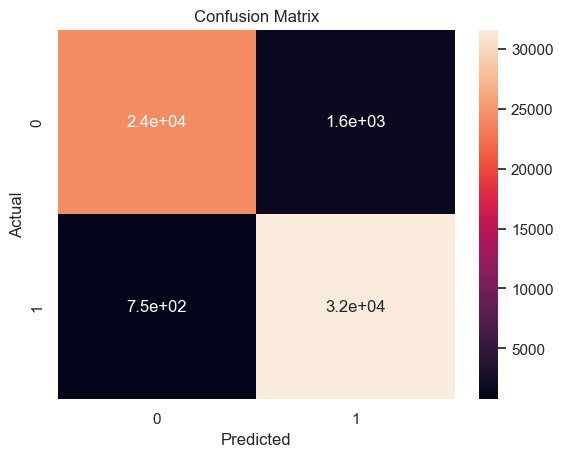

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

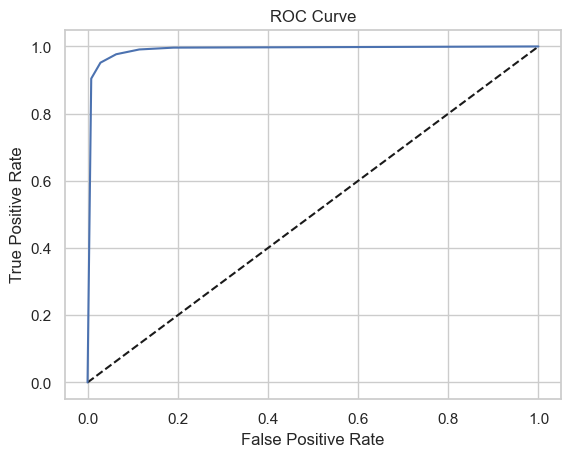

 AUC Score: 0.9900660676030871


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **3- Decision Tree:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9354351778791725
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     25939
           1       0.94      0.95      0.94     32359

    accuracy                           0.94     58298
   macro avg       0.94      0.93      0.93     58298
weighted avg       0.94      0.94      0.94     58298



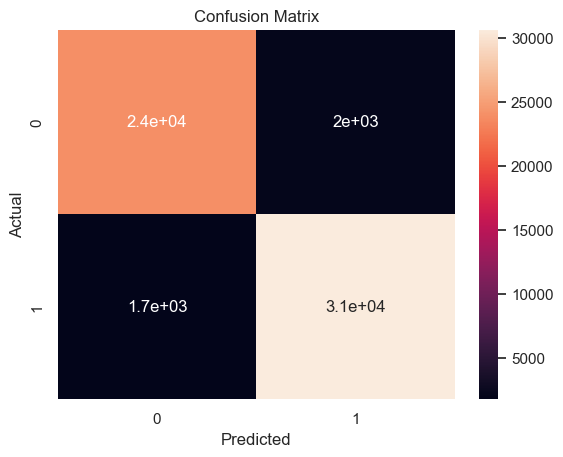

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

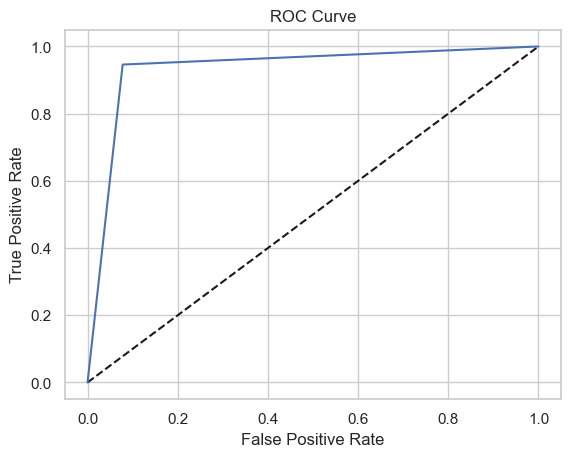

 AUC Score: 0.9341148120644347


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     25939
           1       0.94      0.95      0.94     32359

    accuracy                           0.94     58298
   macro avg       0.94      0.94      0.94     58298
weighted avg       0.94      0.94      0.94     58298

Accuracy: 0.9371505025901403


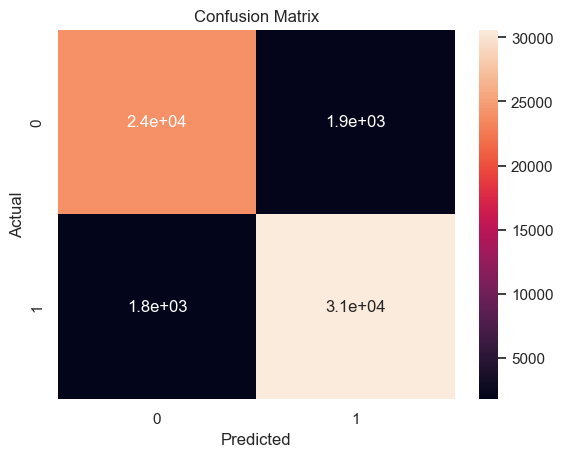

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

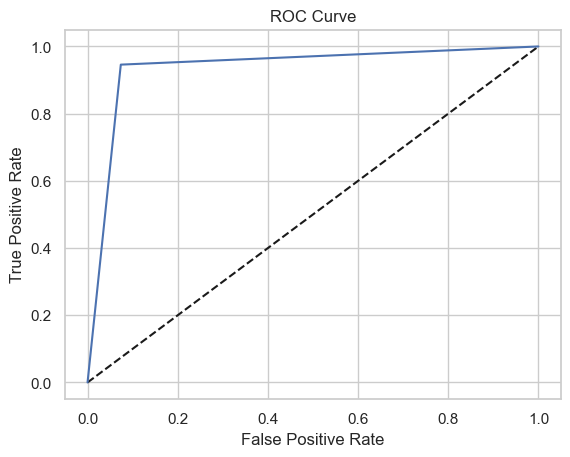

 AUC Score: 0.9360691818254535


In [ ]:
y_pred_proba = best_model.predict_proba(X_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

## **4- Random Forest:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9619026381694055
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     25939
           1       0.97      0.96      0.97     32359

    accuracy                           0.96     58298
   macro avg       0.96      0.96      0.96     58298
weighted avg       0.96      0.96      0.96     58298



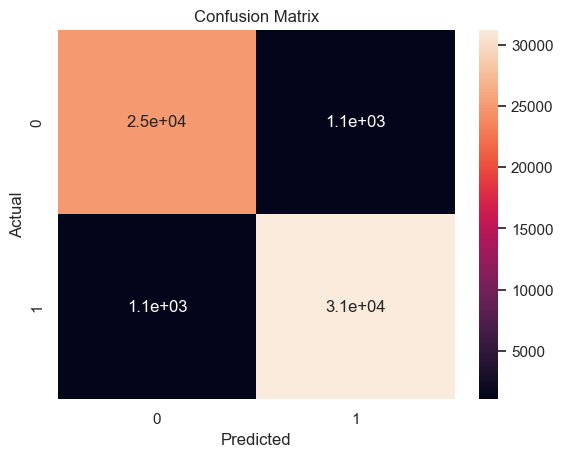

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

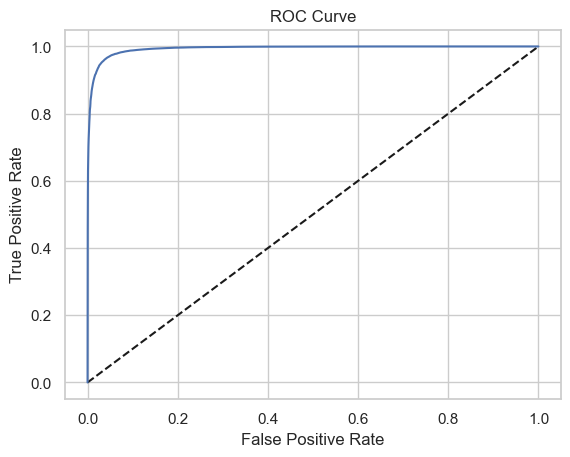

 AUC Score: 0.9932821181358488


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **5- XGBoost:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9507701807952246
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     25939
           1       0.97      0.94      0.96     32359

    accuracy                           0.95     58298
   macro avg       0.95      0.95      0.95     58298
weighted avg       0.95      0.95      0.95     58298



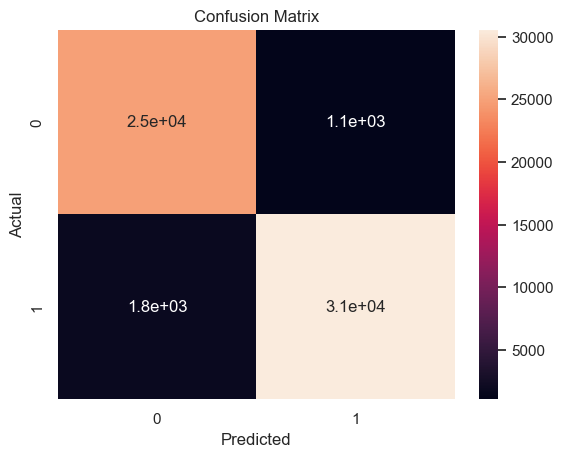

In [ ]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

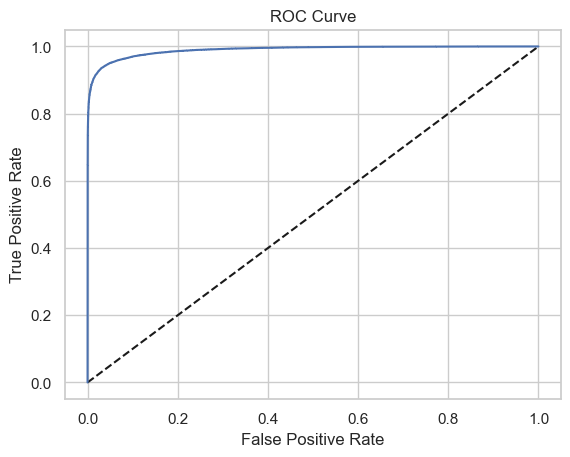

 AUC Score: 0.9894007834189393


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **6- LGBM:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

[LightGBM] [Info] Number of positive: 75278, number of negative: 60749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 136027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553405 -> initscore=0.214437
[LightGBM] [Info] Start training from score 0.214437
Accuracy: 0.9504957288414697
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     25939
           1       0.97      0.94      0.95     32359

    accuracy                           0.95     58298
   macro avg       0.95      0.95      0.95     58298
weighted avg       0.95      0.95      0.95     58298



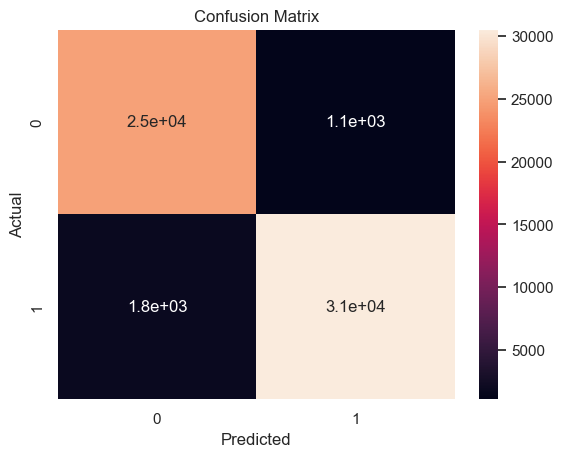

In [ ]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
y_pred_proba = xg_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

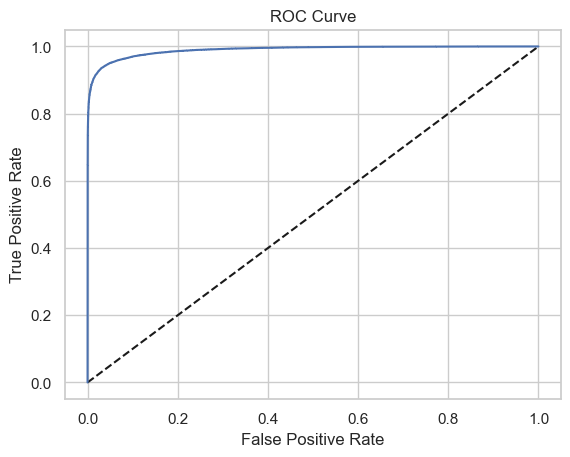

 AUC Score: 0.9894007834189393


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **7- GaussianNB:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.8302857730968473
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81     25939
           1       0.85      0.85      0.85     32359

    accuracy                           0.83     58298
   macro avg       0.83      0.83      0.83     58298
weighted avg       0.83      0.83      0.83     58298



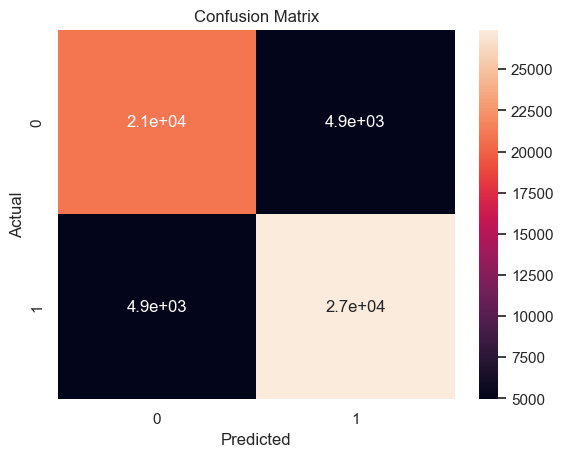

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
y_pred_proba = gnb_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

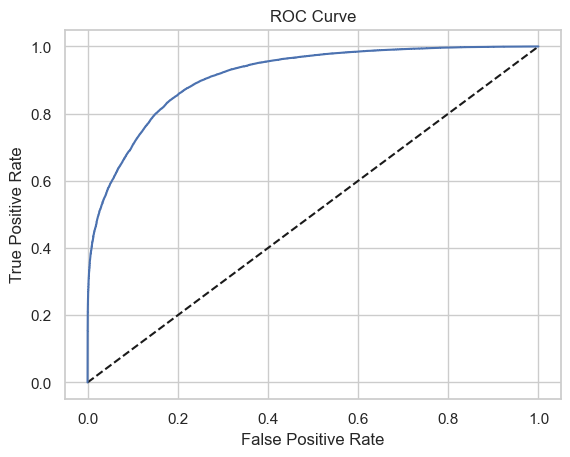

 AUC Score: 0.9117785966812353


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

### **8- CatBoost:**

Learning rate set to 0.083944
0:	learn: 0.5813098	total: 14.8ms	remaining: 14.7s
1:	learn: 0.4980040	total: 28.2ms	remaining: 14.1s
2:	learn: 0.4368367	total: 40ms	remaining: 13.3s
3:	learn: 0.3973471	total: 50.9ms	remaining: 12.7s
4:	learn: 0.3646410	total: 61.4ms	remaining: 12.2s
5:	learn: 0.3383263	total: 72.4ms	remaining: 12s
6:	learn: 0.3205645	total: 83.3ms	remaining: 11.8s
7:	learn: 0.3058944	total: 93.4ms	remaining: 11.6s
8:	learn: 0.2952865	total: 105ms	remaining: 11.5s
9:	learn: 0.2857023	total: 116ms	remaining: 11.5s
10:	learn: 0.2771818	total: 127ms	remaining: 11.4s
11:	learn: 0.2701503	total: 137ms	remaining: 11.3s
12:	learn: 0.2642074	total: 149ms	remaining: 11.3s
13:	learn: 0.2588444	total: 160ms	remaining: 11.2s
14:	learn: 0.2536254	total: 171ms	remaining: 11.3s
15:	learn: 0.2490310	total: 182ms	remaining: 11.2s
16:	learn: 0.2455735	total: 193ms	remaining: 11.1s
17:	learn: 0.2420234	total: 205ms	remaining: 11.2s
18:	learn: 0.2392020	total: 216ms	remaining: 11.2s
19:	lea

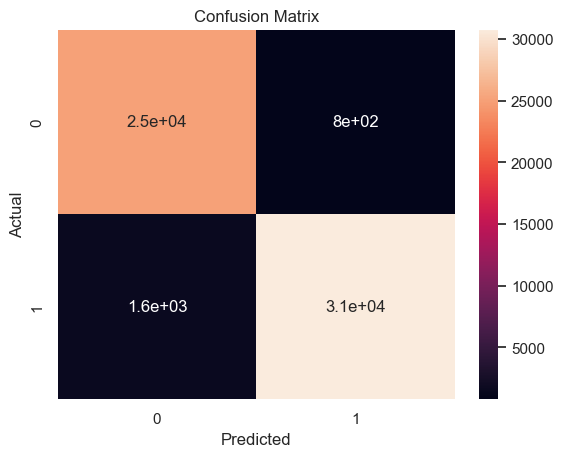

In [ ]:
cb_model = CatBoostClassifier()
cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)
y_pred_proba = cb_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)    
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

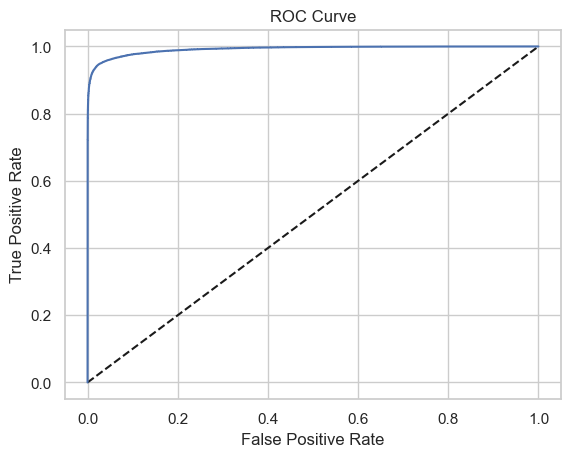

 AUC Score: 0.9917859295530178


In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

[LightGBM] [Info] Number of positive: 75278, number of negative: 60749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 136027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553405 -> initscore=0.214437
[LightGBM] [Info] Start training from score 0.214437
Learning rate set to 0.083944
0:	learn: 0.5813098	total: 12.3ms	remaining: 12.3s
1:	learn: 0.4980040	total: 24.9ms	remaining: 12.4s
2:	learn: 0.4368367	total: 36.1ms	remaining: 12s
3:	learn: 0.3973471	total: 47ms	remaining: 11.7s
4:	learn: 0.3646410	total: 58.8ms	remaining: 11.7s
5:	learn: 0.3383263	total: 71.1ms	remaining: 11.8s
6:	learn: 0.3205645	total: 82.2ms	remaining: 11.7s
7:	learn: 0.3058944	total: 93ms	remaining: 11.5s
8:	learn: 0

<Figure size 1000x600 with 0 Axes>

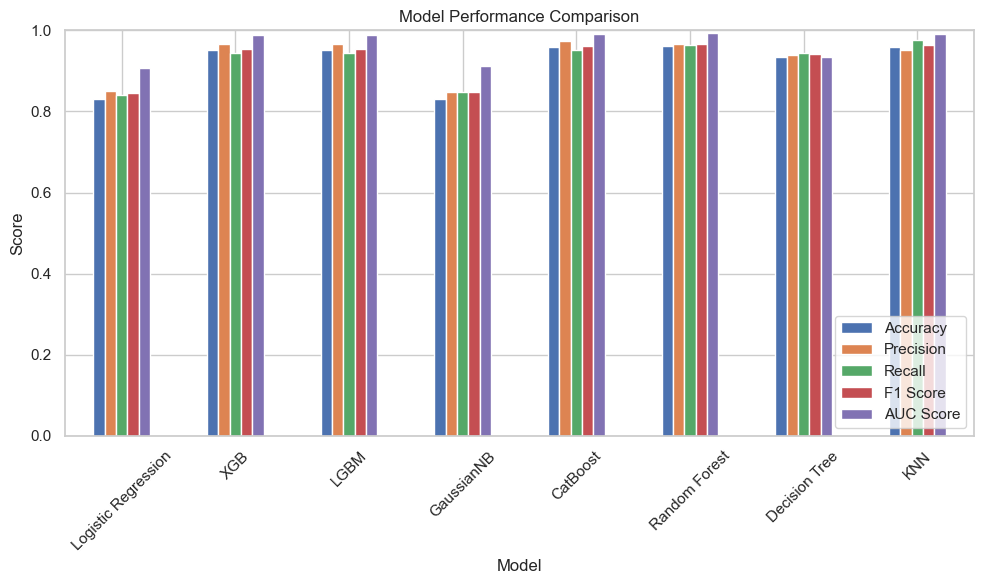

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []
best_model = None
best_model_name = ""
best_f1 = 0

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Basic metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Try AUC
        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba = model.predict_proba(X_test)
                auc = roc_auc_score(y_test, y_pred_proba[:, 1])
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test)
                auc = roc_auc_score(y_test, y_scores)
            else:
                auc = None
        except Exception as e:
            print(f"[{name}] AUC Error: {e}")
            auc = None

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "AUC Score": auc
        })

        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_model_name = name

    except Exception as e:
        print(f"[{name}] Error during training/evaluation: {e}")

# Results as DataFrame
results_df = pd.DataFrame(results)
print("Model Performance:\n", results_df)

# Best model
print(f"\nBest Model Based on F1 Score: {best_model_name} (F1 Score = {best_f1:.4f})")

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score","AUC Score"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### **Best Model is (Random Forest)**